<a href="https://colab.research.google.com/github/Atharva-Garud/DEC_Lab/blob/main/PD25_simple_reg_headbrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression on csv file headbrain.csv**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving headbrain.csv to headbrain.csv


In [2]:
import pandas as pd

df = pd.read_csv('headbrain.csv')

df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170




---



**Simple Linear Regression**

Intercept (B0): 328.6014118561542
Slope (B1): 0.26188775888054894
Mean Squared Error: 4672.043549643725
R-squared: 0.7149168473012071


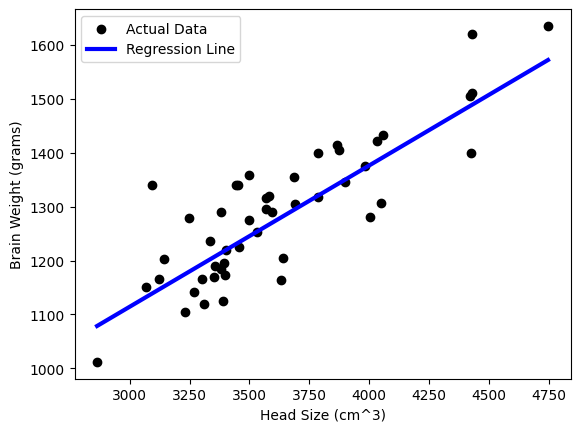

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df[['Head Size(cm^3)']]
y = df['Brain Weight(grams)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

sorted_indices = X_test.squeeze().argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = model.predict(X_test_sorted)

mse = mean_squared_error(y_test_sorted, y_pred_sorted)
r2 = r2_score(y_test_sorted, y_pred_sorted)

intercept = model.intercept_
slope = model.coef_[0]
print(f'Intercept (B0): {intercept}')
print(f'Slope (B1): {slope}')

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(X_test_sorted, y_test_sorted, color='black', label='Actual Data')
plt.plot(X_test_sorted, y_pred_sorted, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()




---



**Root Mean Squared Error**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[['Head Size(cm^3)']]
y = df['Brain Weight(grams)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

def calculate_rmse(actual, predicted):
    sum_squared_diff = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mse = sum_squared_diff / len(actual)
    rmse = mse ** 0.5
    return rmse

rmse_value = calculate_rmse(y_test, y_pred)
print("Root Mean Squared Error:", rmse_value)



Root Mean Squared Error: 68.35234853056423




---



**Evaluate regression alsorithm**

R-squared on Training Data: 0.6157541904869994
Mean Squared Error on Training Data: 5344.524392289756


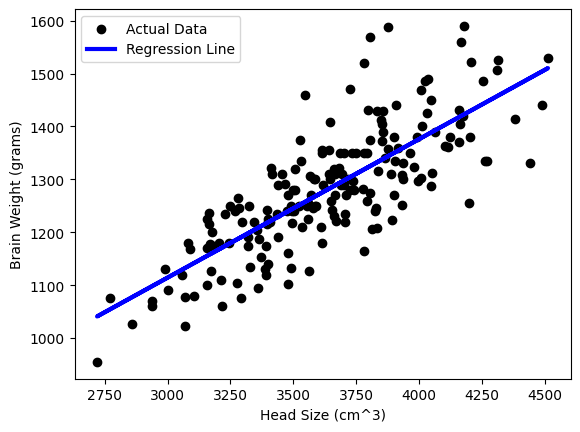

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[['Head Size(cm^3)']]
y = df['Brain Weight(grams)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

def evaluate_regression_algorithm(actual, predicted):

    mean_actual = sum(actual) / len(actual)
    total_sum_squares = sum((a - mean_actual) ** 2 for a in actual)
    residual_sum_squares = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    r_squared = 1 - (residual_sum_squares / total_sum_squares)

    mse = sum((a - p) ** 2 for a, p in zip(actual, predicted)) / len(actual)

    return r_squared, mse

r_squared_train, mse_train = evaluate_regression_algorithm(y_train, y_pred_train)

print(f'R-squared on Training Data: {r_squared_train}')
print(f'Mean Squared Error on Training Data: {mse_train}')

plt.scatter(X_train, y_train, color='black', label='Actual Data')
plt.plot(X_train, y_pred_train, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()




---



**Mean**

In [6]:
def calculate_mean(data):

    means = {}

    for col in data.columns:
        column_data = data[col].tolist()

        mean = sum(column_data) / len(column_data)
        means[col] = mean

    return means

means = calculate_mean(df)
print("Means:", means)

Means: {'Gender': 1.4345991561181435, 'Age Range': 1.5358649789029535, 'Head Size(cm^3)': 3633.9915611814345, 'Brain Weight(grams)': 1282.873417721519}




---



**Variances**

In [7]:
def calculate_variance(data):


    variances = {}

    for col in data.columns:
        column_data = data[col].tolist()

        if len(column_data) < 2:
            raise ValueError(f"Column '{col}' should have at least two elements to calculate variance.")

        mean = sum(column_data) / len(column_data)
        sum_squared_diff = sum((x - mean) ** 2 for x in column_data)
        variance = sum_squared_diff / (len(column_data))

        variances[col] = variance

    return variances

variances = calculate_variance(df)
print("Variances:", variances)

Variances: {'Gender': 0.24572272961954142, 'Age Range': 0.2487137032882898, 'Head Size(cm^3)': 132852.97039292127, 'Brain Weight(grams)': 14420.718154141974}




---



**Covariance**

In [9]:
def calculate_covariance(data, x_col, y_col):

    # Check if the input DataFrame is empty
    if data.empty:
        raise ValueError("Input DataFrame is empty.")

    x_data = data[x_col].tolist()
    y_data = data[y_col].tolist()

    mean_x = sum(x_data) / len(x_data)
    mean_y = sum(y_data) / len(y_data)

    covariance = sum((x - mean_x) * (y - mean_y) for x, y in zip(x_data, y_data)) / (len(x_data))

    return covariance

covariance_xy = calculate_covariance(df, 'Head Size(cm^3)', 'Brain Weight(grams)')
print("Covariance between Head Size(cm^3) and Brain Weight(grams):", covariance_xy)

Covariance between Head Size(cm^3) and Brain Weight(grams): 34997.370239811986




---



**Coefficients(B0, B1)**

In [10]:
def calculate_regression_coefficients(data, x_col, y_col):

    x_data = data[x_col].tolist()
    y_data = data[y_col].tolist()

    mean_x = sum(x_data) / len(x_data)
    mean_y = sum(y_data) / len(y_data)

    numerator = sum((x - mean_x) * (y - mean_y) for x, y in zip(x_data, y_data))
    denominator = sum((x - mean_x) ** 2 for x in x_data)

    B1 = numerator / denominator
    B0 = mean_y - B1 * mean_x

    return B0, B1

B0, B1 = calculate_regression_coefficients(df, 'Head Size(cm^3)', 'Brain Weight(grams)')
print("Intercept (B0):", B0)
print("Slope (B1):", B1)

Intercept (B0): 325.57342104944223
Slope (B1): 0.26342933948939945
